In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_table('train.tsv')

In [3]:
train.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [3]:
price = train.price
price.describe()

count    593376.000000
mean         26.689003
std          38.340061
min           0.000000
25%          10.000000
50%          17.000000
75%          29.000000
max        2000.000000
Name: price, dtype: float64

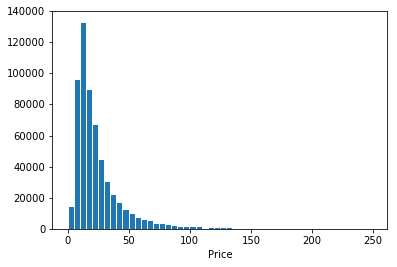

In [4]:
plt.hist(price.loc[price<250], bins=50,edgecolor='w')
plt.xlabel('Price')
plt.show()

In [5]:
train.item_condition_id.unique()

array([3, 1, 2, 4, 5], dtype=int64)

C:\Users\dinsoson\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:518: UserWarning: You have mixed positional and keyword arguments, some input will be discarded.
  warnings.warn("You have mixed positional and keyword "


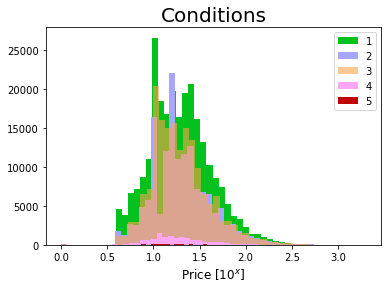

In [6]:
c1 = plt.hist(np.log10(price.loc[train.item_condition_id==1]+1), bins=50,color='#03C21D')
c2 = plt.hist(np.log10(price.loc[train.item_condition_id==2]+1), bins=50,color='#A7A6FD')
c3 = plt.hist(np.log10(price.loc[train.item_condition_id==3]+1), bins=50,color='#FFA348',alpha=.6)
c4 = plt.hist(np.log10(price.loc[train.item_condition_id==4]+1), bins=50,color='#FDA6F5')
c5 = plt.hist(np.log10(price.loc[train.item_condition_id==5]+1), bins=50,color='#C20303')
plt.xlabel('Price [10$^x$]', fontsize=12)
plt.title('Conditions', fontsize=20)
plt.legend([c1,c2,c3,c4,c5],labels=map(str,range(1,6)))
plt.show()

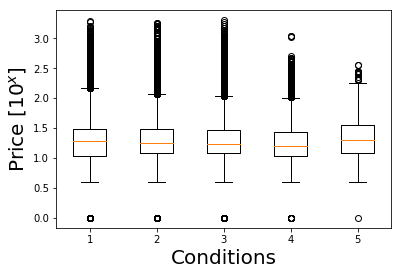

In [7]:
plt.boxplot([np.log10(price.loc[train.item_condition_id==1]+1).values,
             np.log10(price.loc[train.item_condition_id==2]+1).values,
             np.log10(price.loc[train.item_condition_id==3]+1).values,
             np.log10(price.loc[train.item_condition_id==4]+1).values,
             np.log10(price.loc[train.item_condition_id==5]+1).values,])
plt.ylabel('Price [10$^x$]', fontsize=20)
plt.xlabel('Conditions', fontsize=20)
plt.show()

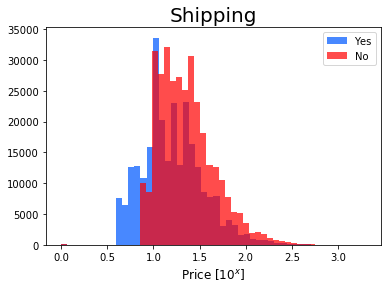

In [8]:
s1 = plt.hist(np.log10(price.loc[train.shipping==1]+1), bins=50,color='#4888FF')
s0 = plt.hist(np.log10(price.loc[train.shipping==0]+1), bins=50,color='r',alpha=.7)
plt.xlabel('Price [10$^x$]', fontsize=12)
plt.title('Shipping', fontsize=20)
plt.legend([s1,s0],labels=['Yes','No'])
plt.show()

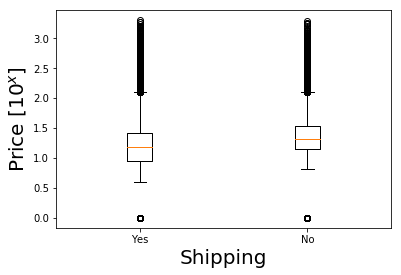

In [9]:
plt.boxplot([np.log10(price.loc[train.shipping==1]+1).values,
             np.log10(price.loc[train.shipping==0]+1).values],
           labels=['Yes','No'])
plt.ylabel('Price [10$^x$]', fontsize=20)
plt.xlabel('Shipping', fontsize=20)
plt.show()

In [9]:
train.name.value_counts()[:10]

Bundle                  901
Reserved                180
BUNDLE                  172
Converse                165
Dress                   163
Coach purse             149
Lularoe TC leggings     144
Nike                    141
American Eagle Jeans    133
Vans                    132
Name: name, dtype: int64

In [8]:
x = train.drop('price', axis=1)
y = train.price
x.brand_name.fillna('miss',inplace=True)
x.category_name.fillna('miss',inplace=True)
x.item_description.fillna('Nodescriptionyet',inplace=True)
x.loc[train.item_description == 'No description yet','item_description']='Nodescriptionyet'
x.drop('train_id',axis=1,inplace=True)
x.loc['name']=xtr.name.apply(lambda x: unicode(x,'utf-8'))
x.loc['item_description']=xtr.item_description.apply(lambda x: unicode(x,'utf-8'))
x.loc['category_name']=xtr.category_name.apply(lambda x: unicode(x,'utf-8'))
from sklearn.model_selection import train_test_split
xtr, xte, ytr, yte = train_test_split(x,y,test_size=.1)

xtr.reset_index(inplace=True,drop=True)
ytr.reset_index(inplace=True,drop=True)

TypeError: decoding Unicode is not supported

In [7]:
xtr.loc['name']=xtr.name.apply(lambda x: unicode(x,'utf-8'))
xtr.loc['item_description']=xtr.item_description.apply(lambda x: unicode(x,'utf-8'))
xtr.loc['category_name']=xtr.category_name.apply(lambda x: unicode(x,'utf-8'))

TypeError: decoding Unicode is not supported

In [13]:
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vct = FeatureUnion([
    ('name', CountVectorizer(ngram_range=(1, 2), max_features=2000, preprocessor=lambda x: x[0].lower())),
    ('category', CountVectorizer(token_pattern='.+',preprocessor=lambda x: x[2])),
    ('brand', CountVectorizer(token_pattern='.+',preprocessor=lambda x: x[3].lower())),
    ('description', TfidfVectorizer(ngram_range=(1, 3),max_features=5000,preprocessor=lambda x: x[5]))
])

In [10]:
xx = xtr.head(100)

In [14]:
%%time

xtrain = vct.fit_transform(xtr.values)

Wall time: 4min 38s


In [20]:
from scipy.sparse import hstack

In [33]:
xtrain = hstack([xtrain,xtr.item_condition_id.values.reshape(xtrain.shape[0],1),xtr.shipping.values.reshape(xtrain.shape[0],1)])

In [35]:
from sklearn.linear_model import Lasso

In [36]:
lassoreg = Lasso(
    fit_intercept=True, 
    alpha=0.5,
    max_iter=100
)

In [37]:
lassoreg.fit(xtrain,ytr)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=100,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
import re
re1 = re.compile('[a-z]+')
def tk(x):
    return re1.findall(x)
# train.item_description.loc[train.item_description == 'No description yet']='Nodescriptionyet'
# item = train.item_description.fillna('Nodescriptionyet').str.lower().apply(lambda x: re1.findall(x))

In [141]:
from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
def nostop(l):
    x=[]
    for i,s in enumerate(l):
        if s not in stop_words:
            x.append(s)
    return x
item = item.apply(nostop)

In [145]:
train['item_description']=item.apply(lambda x: ' '.join(x))
train.brand_name.fillna('missing', inplace=True)
# train['name']=train.name.str.lower()
# train['brand_name']=train.brand_name.str.lower()
train.drop('train_id',axis=1,inplace=True)

In [66]:
train.item_description.loc[train.item_description == 'No description yet']='Nodescriptionyet'

In [12]:
train['brand_name']=train.brand_name.str.lower()
train.drop('train_id', axis=1, inplace=True)
train.brand_name.fillna('missing', inplace=True)

In [52]:
xt=train[0:100].drop('price', axis=1)

In [62]:
# xt.item_description.apply(lambda x: unicode(x,'utf-8'))
xt.name = xt.name.apply(tk)

In [63]:
xt[33:34]

,name,item_condition_id,category_name,brand_name,shipping,item_description
33,"[audal, e, eauty, lixir, pray]",1,Beauty/Skin Care/Face,sephora,1,New unused and authentic. Caudalie beauty elix...


In [37]:
train[24:25].item_description.astype(str)[24]

'lanascloset ~~~ description: never worn! \xe2\x9c\xa8 i delete/update my listings and relist them so like my \xe2\x80\x9csold\xe2\x80\x9d listings to have easier access to my shop later on ~~~ \xe2\x9c\xa8 i normally ship the following day, but it happens that i ship a few days after purchase ~~~ forever 21 brandy Melville baseball tee'

In [32]:
xt.brand_name = xt.name.astype(str)

In [49]:
xt.name=xt.brand_name

In [50]:
vct.fit_transform(xt.values)

<2x345 sparse matrix of type '<type 'numpy.float64'>'
	with 346 stored elements in Compressed Sparse Row format>

In [39]:
print unicode(train[24:25].item_description.astype(str)[24],'utf-8')

lanascloset ~~~ description: never worn! ✨ i delete/update my listings and relist them so like my “sold” listings to have easier access to my shop later on ~~~ ✨ i normally ship the following day, but it happens that i ship a few days after purchase ~~~ forever 21 brandy Melville baseball tee


In [125]:
train.item_description[34]

'2 beanie babies pugsley wrinkles Puppy with pumpkin Big dog Retro Pinup Doll Frilly Skirted Adorable Barbie pinkSuper cute! Fan martini cherry pinup anchor marabou #Kitschoure #beasweetlollipopinaworldofsoursuckers From LOVE in sunny San Diego CALI-FORNIA US of A! Absolutely adorable soft genuine real bunny fox Foxy Loxy fur Stunning and gorgeous! Bambi long eyelashes ! Sweet cheeks blush pink juicy dollface! Candy colors! girlfriend. Dance club baby! Panty Present for the girl who has everything! Cupcake couture resin kawaii Lolita dress up gift for lime crime Pegasus unicorn flamingo swan princess kitty pinup rockabilly girls jewelry and wild fox lolita kawaii Gypsy wedding Festival EDF Electronic dance Rave Raver Coachella Party'

In [9]:
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vct = FeatureUnion([
    ('name', CountVectorizer(ngram_range=(1, 3), max_features=500, preprocessor=lambda x: x[0].lower())),
    ('category', CountVectorizer(token_pattern='.+',preprocessor=lambda x: x[2])),
    ('brand', CountVectorizer(token_pattern='.+',preprocessor=lambda x: x[3].lower())),
    ('description', TfidfVectorizer(ngram_range=(1, 3),max_features=1000,preprocessor=lambda x: x[5]))
])

In [77]:
CountVectorizer(token_pattern='.+').fit_transform(xt.category_name)

<100x67 sparse matrix of type '<type 'numpy.int64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [78]:
CountVectorizer(token_pattern='.+').fit_transform(xt.brand_name)

<100x49 sparse matrix of type '<type 'numpy.int64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [79]:
CountVectorizer(ngram_range=(1, 3)).fit_transform(xt.name)

<100x911 sparse matrix of type '<type 'numpy.int64'>'
	with 1014 stored elements in Compressed Sparse Row format>

In [161]:
train.item_description[33].decode('utf-8')

u'new unused authentic caudalie beauty elixir mist oz'

In [94]:
TfidfVectorizer(ngram_range=(1, 3),tokenizer=tk).fit_transform(xt.item_description)

<100x5547 sparse matrix of type '<type 'numpy.float64'>'
	with 6915 stored elements in Compressed Sparse Row format>

In [24]:
vct.fit_transform(xt.values)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 6: ordinal not in range(128)

In [115]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
def nostop(l):
    x=[]
    for i,s in enumerate(l):
        if s not in stop_words:
            x.append(s)
    return x

item = train.item_description

In [112]:
%%time
item = train.item_description.apply(word_tokenize)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 6: ordinal not in range(128)

In [116]:
xx.apply(word_tokenize)

10    [0.25, oz, Full, size, is, 1oz, for, [, rm, ],...
11    [(, 5, ), new, vs, pink, body, mists, (, 2.5, ...
12                            [Xl, ,, great, condition]
13                               [No, description, yet]
14    [Authentic, ., Suede, fringe, boots, ., Great,...
15    [Brand, new, ., Deluxe, travel, size, products...
16    [2, glitter, eyeshadows, ;, one, in, Brass, an...
17    [Brand, new, in, box, Size, :, Medium, Color, ...
18    [This, AUTHENTIC, pallete, by, Too, Faced, is,...
19    [Fancy, ,, dressy, or, casual, !, Dress, it, u...
Name: item_description, dtype: object

In [112]:
xx = train.item_description[10:20]

In [110]:
xxx.apply(nostop)

0                               [No, description, yet]
1    [This, keyboard, great, condition, works, like...
2    [Adorable, top, hint, lace, key, hole, back, !...
3    [New, tags, ., Leather, horses, ., Retail, [, ...
4                [Complete, certificate, authenticity]
Name: item_description, dtype: object

In [113]:
xx

10         0.25 oz Full size is 1oz for [rm] in Sephora
11    (5) new vs pink body mists (2.5 oz each) Fresh...
12                                  Xl, great condition
13                                   No description yet
14    Authentic. Suede fringe boots. Great condition...
15    Brand new. Deluxe travel size products. Contai...
16    2 glitter eyeshadows; one in Brass and one in ...
17    Brand new in box Size: Medium Color: Coral Ret...
18    This AUTHENTIC pallete by Too Faced is brand n...
19    Fancy, dressy or casual! Dress it up or down 1...
Name: item_description, dtype: object

In [ ]:
import re

In [ ]:
re1 = re.compile('[a-z]+')
re1.findall()

In [133]:
item_description.apply(lambda x: re1.findall(x))

0                                     [o, description, yet]
1         [his, keyboard, is, in, great, condition, and,...
2         [dorable, top, with, a, hint, of, lace, and, a...
3         [ew, with, tags, eather, horses, etail, for, r...
4            [omplete, with, certificate, of, authenticity]
5         [anana, republic, bottoms, andies, skirt, with...
6         [ize, small, but, straps, slightly, shortened,...
7         [ou, get, three, pairs, of, ophie, cheer, shor...
8         [irls, ize, small, lus, green, hree, shorts, t...
9         [realized, his, pants, are, on, backwards, aft...
10             [oz, ull, size, is, oz, for, rm, in, ephora]
11        [new, vs, pink, body, mists, oz, each, resh, l...
12                                    [l, great, condition]
13                                    [o, description, yet]
14        [uthentic, uede, fringe, boots, reat, conditio...
15        [rand, new, eluxe, travel, size, products, ont...
16        [glitter, eyeshadows, one, in,

In [82]:
regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]')

In [84]:
regex.sub(' ',xx.str.lower()[24])

'lanascloset     description  never worn  \xe2\x9c\xa8 i delete update my listings and relist them so like my \xe2\x80\x9csold\xe2\x80\x9d listings to have easier access to my shop later on     \xe2\x9c\xa8 i normally ship the following day  but it happens that i ship a few days after purchase     forever    brandy melville baseball tee'

In [58]:
xx.str.lower()[20]

'size 1. worn once. excellent condition'

In [72]:
regex = re.compile('[' +re.escape(string.punctuation)+']')

In [85]:
regex.findall(xx[24])

['~', '~', '~', ':', '!', '/', '~', '~', '~', ',', '~', '~', '~', '2', '1']

In [106]:
re1 = re.compile('[a-z]+')

In [111]:
re1.findall(xx.str.lower()[24])

['lanascloset',
 'description',
 'never',
 'worn',
 'i',
 'delete',
 'update',
 'my',
 'listings',
 'and',
 'relist',
 'them',
 'so',
 'like',
 'my',
 'sold',
 'listings',
 'to',
 'have',
 'easier',
 'access',
 'to',
 'my',
 'shop',
 'later',
 'on',
 'i',
 'normally',
 'ship',
 'the',
 'following',
 'day',
 'but',
 'it',
 'happens',
 'that',
 'i',
 'ship',
 'a',
 'few',
 'days',
 'after',
 'purchase',
 'forever',
 'brandy',
 'melville',
 'baseball',
 'tee']

In [129]:
TfidfVectorizer().fit_transform(xx['item_description']).toarray()

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.44863732,  0.        ,
         0.36195776,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.44863732,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.44863732,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.25275444,  0.        ,  0.        ,  0.        ,  0.44863732,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.17622997,  0.17622997,  0.11802326,  0.17622997,
         0.     

In [63]:
from sklearn.pipeline import FeatureUnion

In [72]:
cv = FeatureUnion([
    ('brand_name',CountVectorizer(token_pattern='.+',preprocessor=build_preprocessor('brand_name'))),
    ('item_description',CountVectorizer(preprocessor=build_preprocessor('item_description')))
])

In [74]:
cvx = xx[['brand_name','item_description']]

In [104]:
cvx.values[[1]]

array([['Nick Jr.',
        'Retails [rm] works great. Kids have too many toys. I also have another listing for the air patroller and the paw patroller. Can make a bundle to save on shipping!']], dtype=object)

In [111]:
full_df = xx

In [78]:
default_preprocessor = CountVectorizer().build_preprocessor()
def build_preprocessor(field):
    field_idx = list(cvx.columns).index(field)
    return lambda x: default_preprocessor(x[field_idx])

In [80]:
list(cvx.columns).index('brand_name')

0

In [87]:
list(cvx.columns)

['brand_name', 'item_description']

In [ ]:
full_df['shipping'] = full_df['shipping'].astype(str)
full_df['item_condition_id'] = full_df['item_condition_id'].astype(str)

In [119]:
full_df['shipping'].values

array(['1', '0', '1', '1', '0', '0', '0', '1', '0', '0'], dtype=object)

In [ ]:
def build_preprocessor(field):
    field_idx = list(full_df.columns).index(field)
    return lambda x: default_preprocessor(x[field_idx])

vectorizer = FeatureUnion([
    ('name', CountVectorizer(
        ngram_range=(1, 2),
        max_features=50000,
        preprocessor=build_preprocessor('name'))),
    ('category_name', CountVectorizer(
        token_pattern='.+',
        preprocessor=build_preprocessor('category_name'))),
    ('brand_name', CountVectorizer(
        token_pattern='.+',
        preprocessor=build_preprocessor('brand_name'))),
    ('shipping', CountVectorizer(
        token_pattern='\d+',
        preprocessor=build_preprocessor('shipping'))),
    ('item_condition_id', CountVectorizer(
        token_pattern='\d+',
        preprocessor=build_preprocessor('item_condition_id'))),
    ('item_description', TfidfVectorizer(
        ngram_range=(1, 3),
        max_features=100000,
        preprocessor=build_preprocessor('item_description'))),
])

X = vectorizer.fit_transform(full_df.values)

In [122]:
print ('s')

s


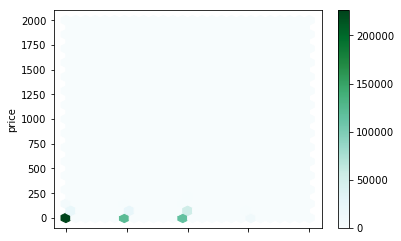

In [53]:
train[['item_condition_id','price']].plot.hexbin(x='item_condition_id', y='price', gridsize=25)